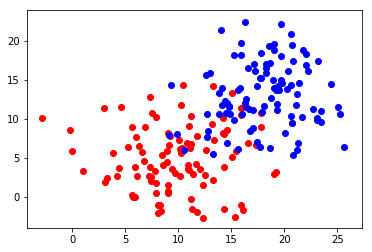

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2019)
data = np.random.randn(200,2)
data[:100,0]=data[:100,0]*4+10
data[:100,1]=data[100:,1]*4+5

data[100:,0]=data[100:,0]*4+18
data[100:,1]=data[100:,1]*4+13
y=np.append(np.ones(100),np.zeros(100))

plt.scatter(data[:100,0], data[:100,1],color="red",marker='o',label='class1')
plt.scatter(data[100:,0], data[100:,1],color='blue',marker='o',label='class2')

In [2]:
X_train, X_test, y_train , y_test = train_test_split( data , y , test_size=0.25,stratify=y)


In [3]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [4]:
def cost_function(features, target, weights):
    scores = np.dot(features,weight)
    cf = np.sum( -target*scores + np.log(1 + np.exp(scores)) )
    return cf



In [7]:
def logistic_regression(features, target, num_steps, learning_rate,add_intercept="False"):
    if add_intercept:
        intercept = np.ones((features.shape[0],1))
        features = np.hstack((intercept, features))
    ypred=[]
    weights=np.zeros(features.shape[1])
    
    for i in range(num_steps):
        scores = np.dot(features,weights)
        predictions = sigmoid(scores)
        gradient = np.dot(features.T,predictions-target)
        weights =weights- ((learning_rate/features.shape[0]) * gradient)
        
    score_final = np.dot(features,weights)
    score_final_sigmoid=sigmoid(score_final)
    ypred=np.round(score_final_sigmoid)
    
    return ypred

In [8]:

i=logistic_regression(X_test,y_test,10000,0.01,add_intercept="True")
print(np.sum((i-y_test)==0)/len(i))

0.96
